In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
# Import Random Forest
from sklearn.ensemble import RandomForestClassifier
# Import XGBoost
#from xgboost import XGBClassifier

In [42]:
#!pip list 

In [43]:
data = pd.read_csv('train.csv')

In [44]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [45]:
# Check NaN value
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [46]:
data['Cabin'] = data['Cabin'].fillna('N')
data['Age'] = data['Age'].fillna(data['Age'].mean())

In [47]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

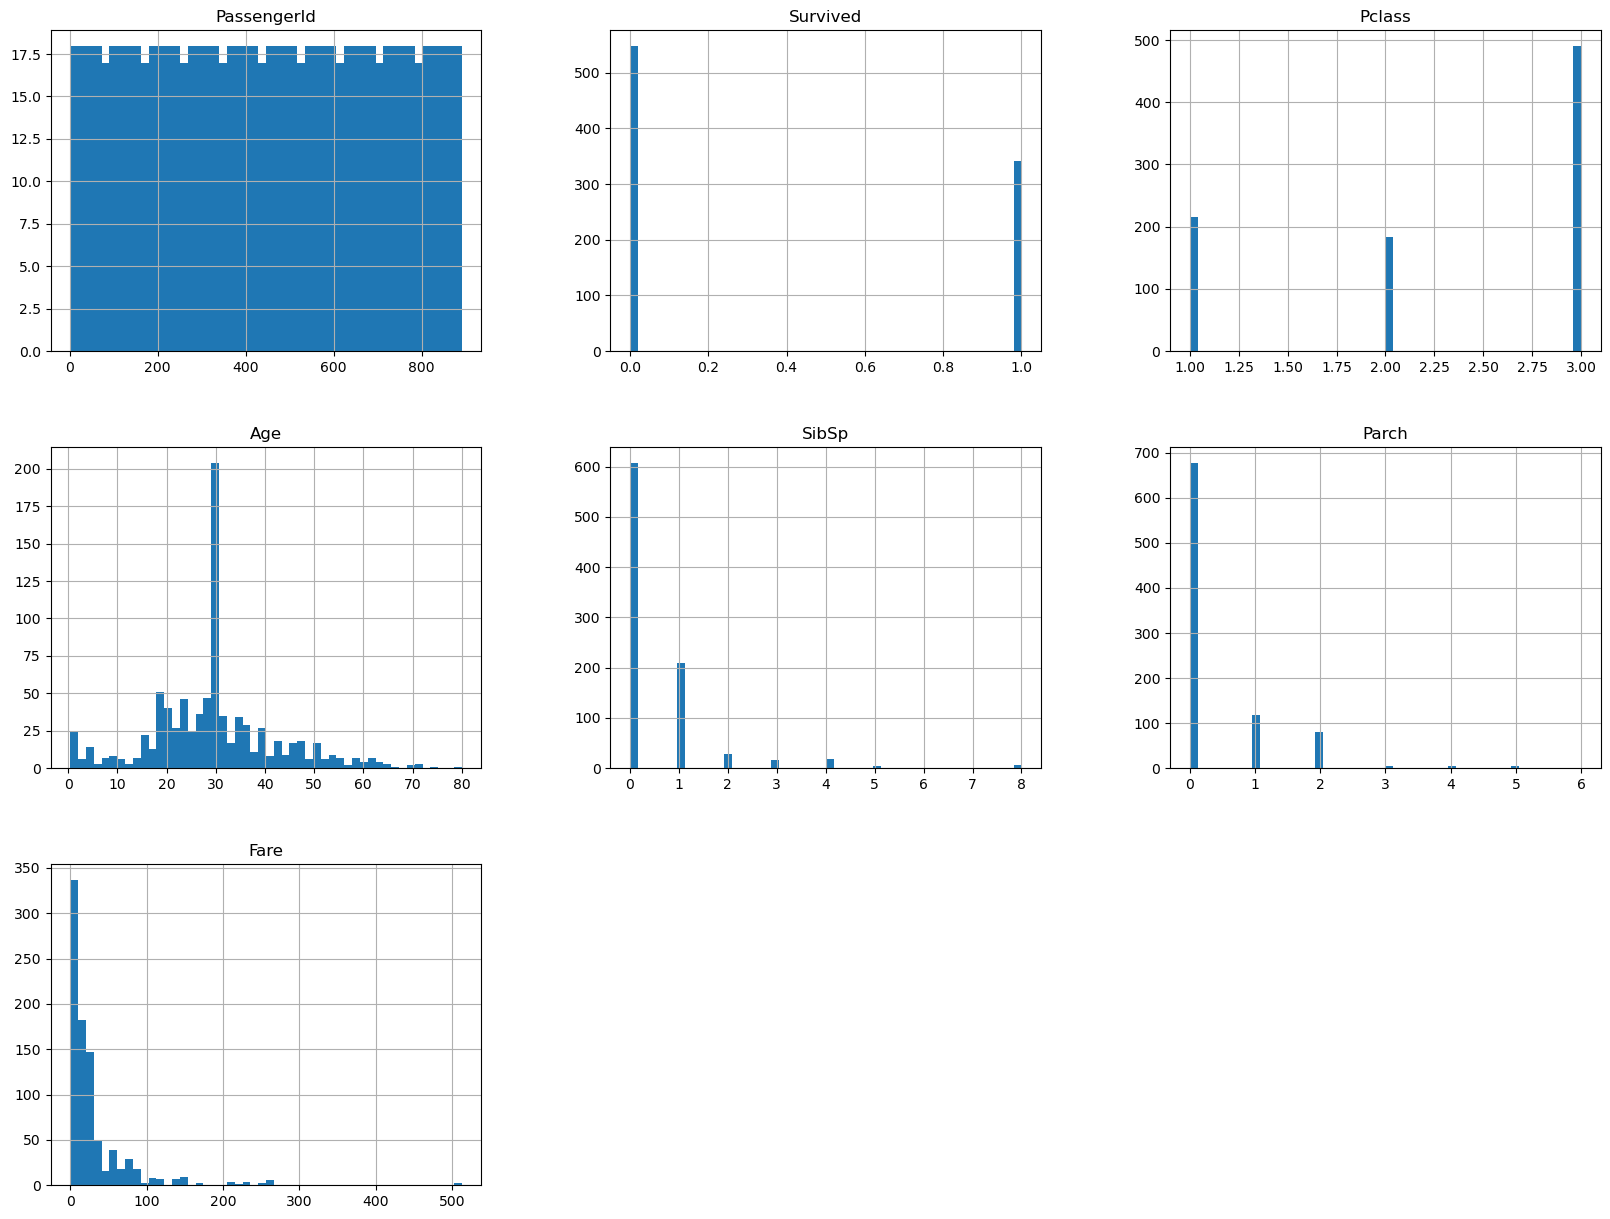

In [48]:
# Histogram for all column
data.hist(bins=50, figsize=(20,15))
plt.show()

<Axes: xlabel='AgeGroup', ylabel='count'>

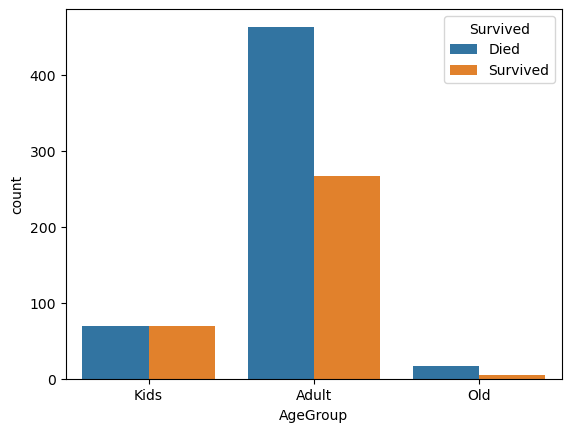

In [49]:
# Show how many people aged kids (0-18), adult (18-60), and old (60-) survived or died
data['AgeGroup'] = pd.cut(data['Age'], bins=[0,18,60,100], labels=['Kids','Adult','Old'])
data['Survived'] = data['Survived'].map({0: 'Died', 1: 'Survived'})
sns.countplot(x='AgeGroup', hue='Survived', data=data)

In [50]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,Died,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,N,S,Adult
1,2,Survived,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,Adult
2,3,Survived,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,N,S,Adult
3,4,Survived,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,Adult
4,5,Died,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,N,S,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,Died,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,N,S,Adult
887,888,Survived,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,Adult
888,889,Died,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,N,S,Adult
889,890,Survived,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,Adult


<Axes: xlabel='Cabin'>

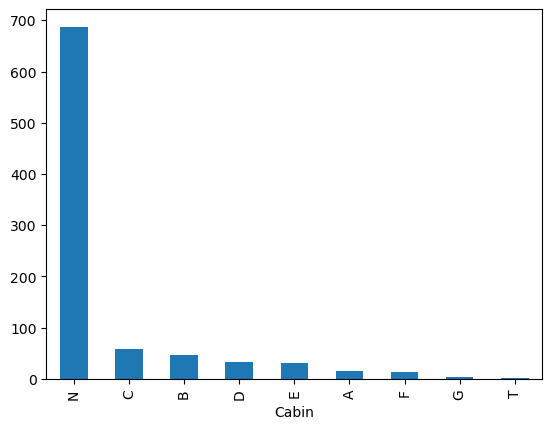

In [51]:
# Histogram
data['Cabin'] = data['Cabin'].apply(lambda x: x[0])
data['Cabin'].value_counts().plot(kind='bar')

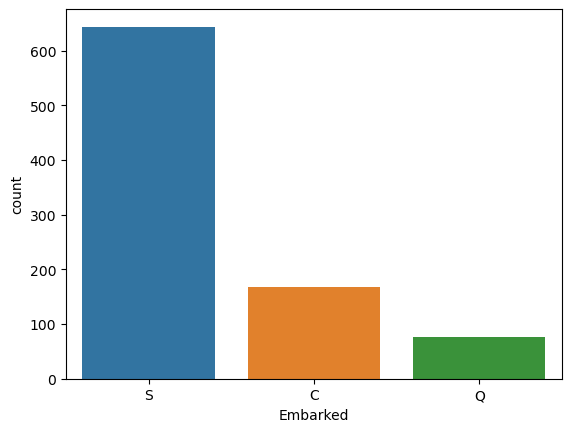

In [52]:
# Count the embarked
sns.countplot(x='Embarked', data=data)
plt.show()


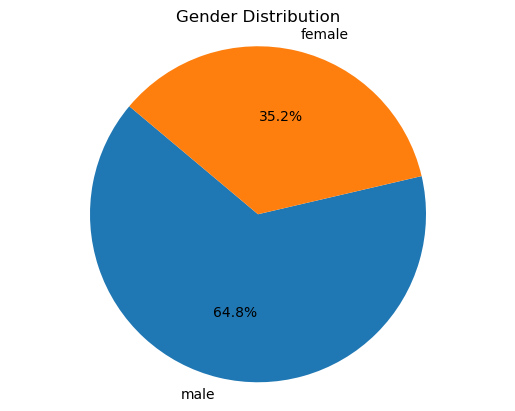

In [53]:
# Count the gender using pie chart
gender_counts = data['Sex'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Gender Distribution')
plt.show()

c:\Users\ravendrasr\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


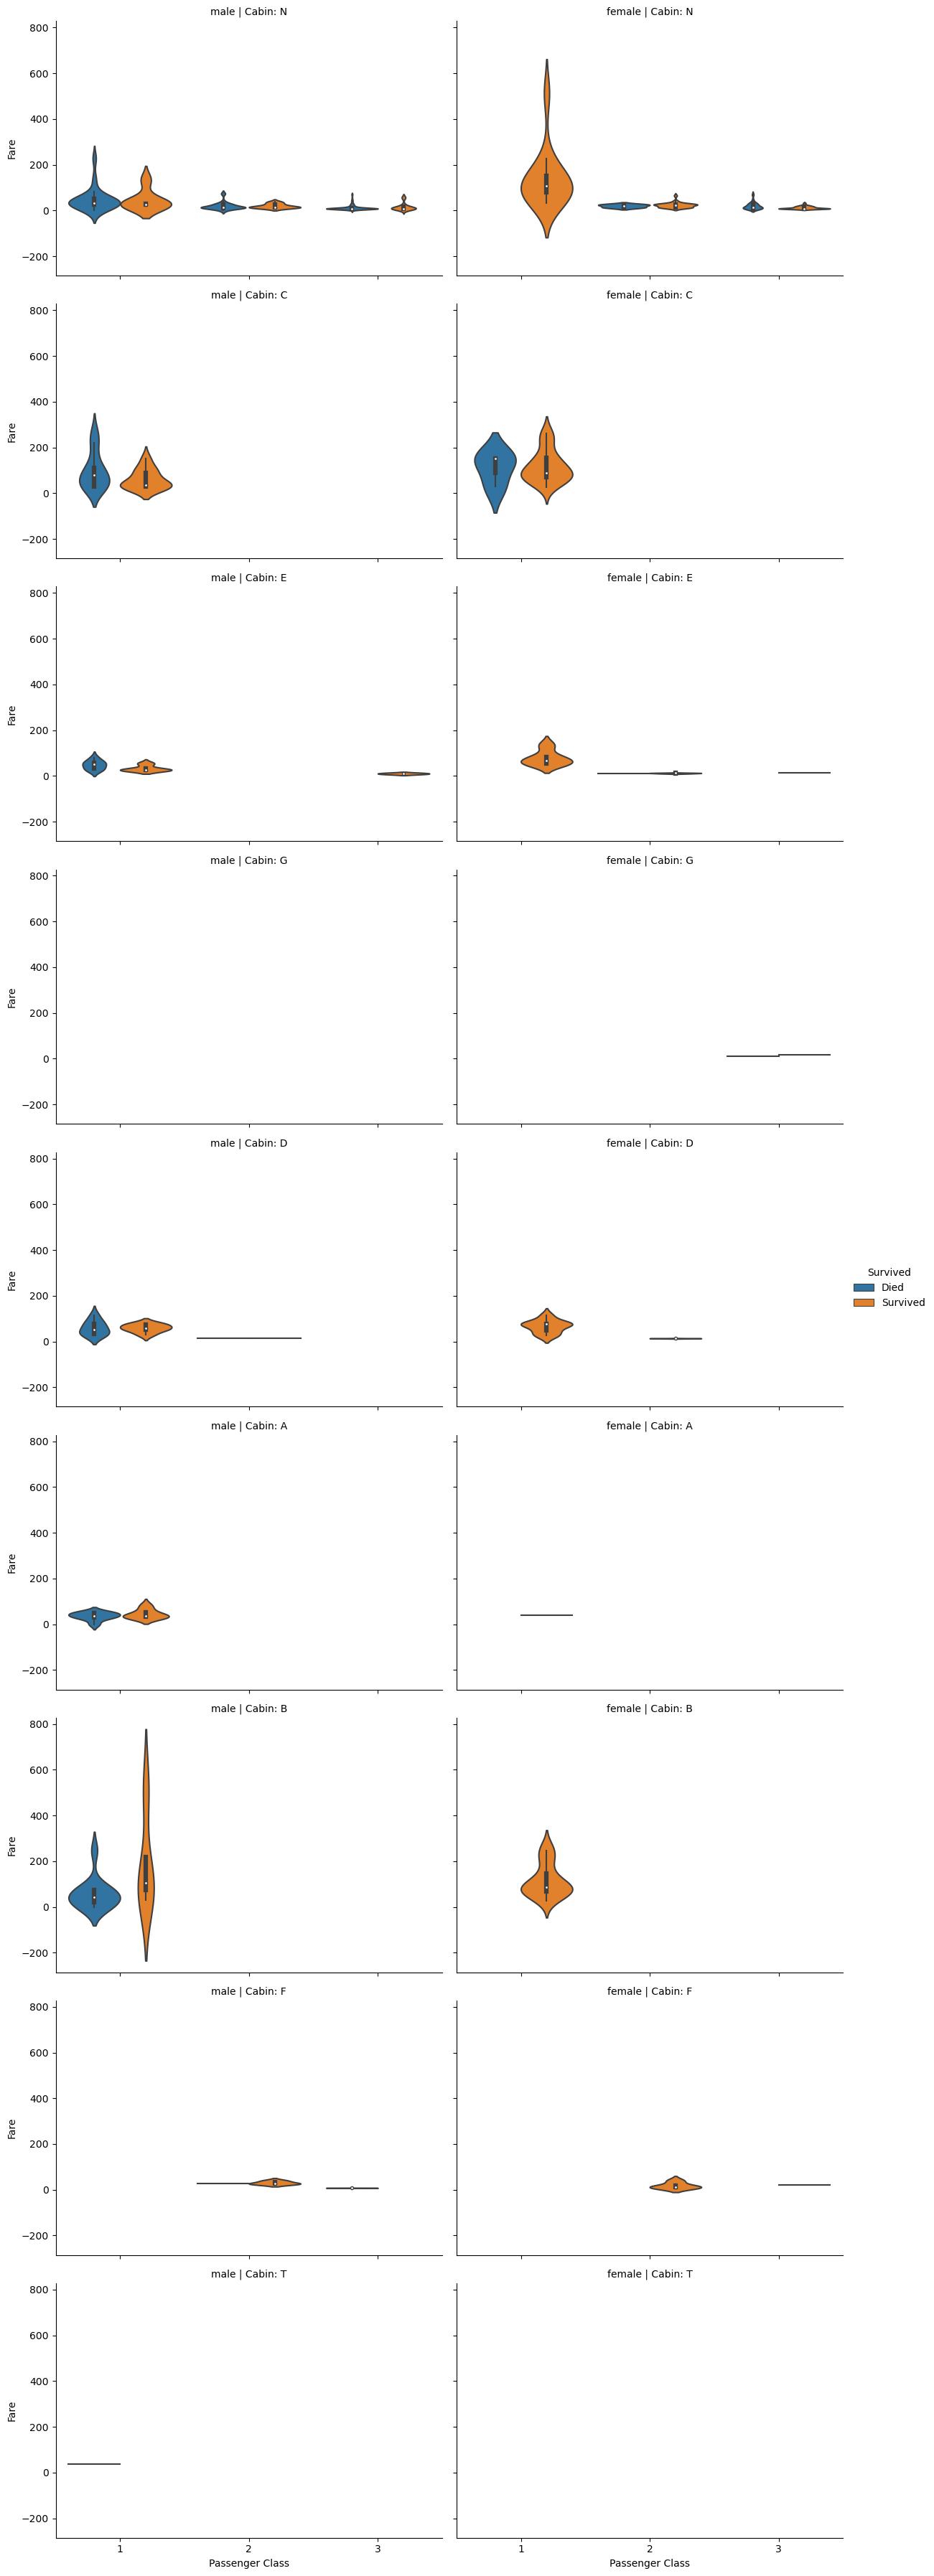

In [55]:
# Distribute the surviving passengers based on fare, gender, class, age, and cabin
g = sns.catplot(
    x='Pclass', 
    y='Fare', 
    hue='Survived', 
    col='Sex', 
    row='Cabin', 
    data=data, 
    kind='violin', 
    height=4, 
    aspect=1.5
)
g.set_axis_labels("Passenger Class", "Fare")
g.set_titles("{col_name} | Cabin: {row_name}")
plt.show()


In [56]:
# Predicting whether passangers survived or not based on gender, cabin, fare, and age

data['CabinLabel'] = LabelEncoder().fit_transform(data['Cabin'])

print(data['CabinLabel'])


0      7
1      2
2      7
3      2
4      7
      ..
886    7
887    1
888    7
889    2
890    7
Name: CabinLabel, Length: 891, dtype: int32


In [57]:
data['SexLabel'] = LabelEncoder().fit_transform(data['Sex'])
print(data['SexLabel'])
# 0 = Female
# 1 = Male

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: SexLabel, Length: 891, dtype: int32


In [58]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,CabinLabel,SexLabel
0,1,Died,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,N,S,Adult,7,1
1,2,Survived,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,C,Adult,2,0
2,3,Survived,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,N,S,Adult,7,0
3,4,Survived,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C,S,Adult,2,0
4,5,Died,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,N,S,Adult,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,Died,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,N,S,Adult,7,1
887,888,Survived,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B,S,Adult,1,0
888,889,Died,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,N,S,Adult,7,0
889,890,Survived,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,C,Adult,2,1


In [59]:
# Logistic Regression
# Prepare the data
X = data[['Pclass', 'Age', 'Fare', 'CabinLabel', 'SexLabel']]
y = data['Survived']




In [60]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
# Train the model : Logistic Regression, Random Forest, XGBoost
model_lr = LogisticRegression(max_iter=200)
model_random_forest = RandomForestClassifier(n_estimators=100)


In [62]:
model_lr.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [63]:
model_random_forest.fit(X_train, y_train)

RandomForestClassifier()

In [65]:
# Predict and evaluate
y_pred_lr = model_lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f'LR Accuracy: {accuracy_lr:.2f}')

LR Accuracy: 0.81


In [66]:
y_pred_rf = model_random_forest.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'RF Accuracy: {accuracy_rf:.2f}')

RF Accuracy: 0.78


<Axes: >

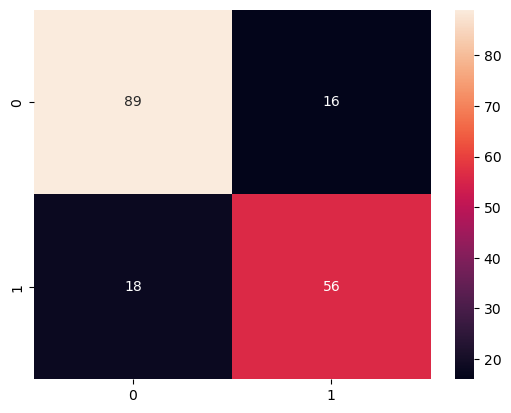

In [67]:
# Confusion Matrix

confusion_matrix(y_test, y_pred_lr)
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d')

<Axes: >

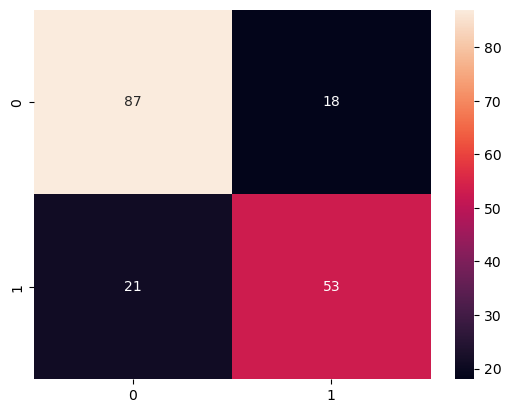

In [68]:
confusion_matrix(y_test, y_pred_rf)
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d')

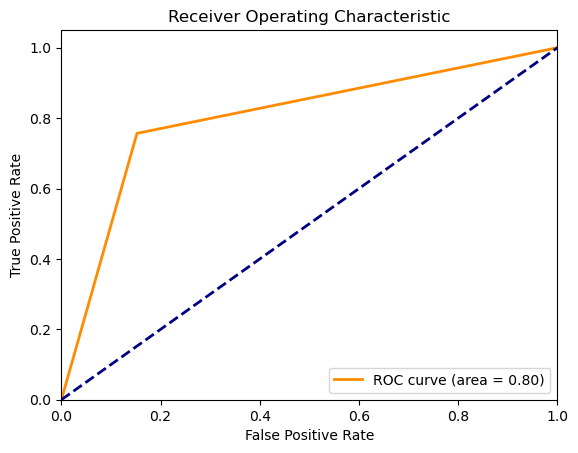

In [75]:
# Convert y_test and y_pred_lr to numeric values
label_encoder = LabelEncoder()
y_test_numeric = label_encoder.fit_transform(y_test)
y_pred_lr_numeric = label_encoder.transform(y_pred_lr)

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test_numeric, y_pred_lr_numeric, pos_label=1)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

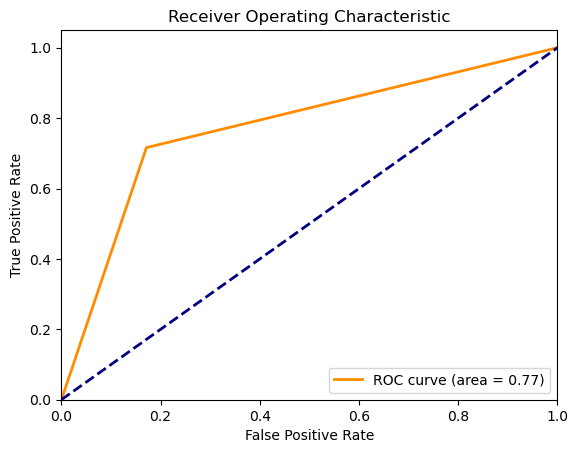

In [76]:
# Convert y_test and y_pred_lr to numeric values
y_test_numeric = label_encoder.fit_transform(y_test)
y_pred_rf_numeric = label_encoder.transform(y_pred_rf)

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test_numeric, y_pred_rf_numeric, pos_label=1)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [82]:
import streamlit as st

In [83]:
st.write("Hello World")

2024-09-16 14:16:46.811 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-16 14:16:46.812 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-16 14:16:46.813 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-16 14:16:46.813 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
